# Research for Online Store Ice

This study aims to spot potential big winners in terms of sales of online game platform and to be able to plan better advertising campaigns in the following year.

### Table of Contents
* <a href="#Step 1">Opening the Data ></a><br>
    * <a href="#df_head">Dataframe head</a><br>
    * <a href="#df_columns">Dataframe columns</a><br>
    * <a href="#df_describe">Dataframe description</a><br>
    * <a href="#df_info">Dataframe information</a><br>
        * <a href="#step1_conclusion">Conclusion</a><br>
* <a href="#Step 2">Prepare the Data</a><br>
    * <a href="#lowercase">Column names to Lower case</a><br>
    * <a href="#datatypes">Converting data types</a><br>
    * <a href="#missing">Dealing with missing values</a><br>
        * <a href="#step2_conclusion">Conclusion</a><br>
* <a href="#Step 3">Analyze The Data</a><br>
    * <a href="#realsedgames">Released games per year</a><br>
    * <a href="#variedsales">Variety of sales</a><br>
    * <a href="#greatestsales">Platforms with greatest sales</a><br>
    * <a href="#pop2zero">Popular to Zero platforms</a><br>
    * <a href="#relevantperiod">Relevant data and period</a><br>
    * <a href="#growsink">Growing and Sinking platforms</a><br>
    * <a href="#profitable">Most profitable genres</a><br>
    * <a href="#gendist">General distribution by genre</a><br>
    * <a href="#corelation">Corelation plots</a><br>
        * <a href="#Step3conclusion">Conclusion</a><br>
* <a href="#Step 4">User profile for each region</a><br>
    * <a href="#hyphotesis1">Testing users plan hyphotesis</a><br>
    * <a href="#hyphotesis2">Testing users plan hyphotesis</a><br>
        * <a href="#step4conclusion">Conclusion</a><br>
* <a href="#Step 5">Testing the Hypothesis</a><br>
     * <a href="#hyphotesis1">Testing Xbox One and PC platforms hyphotesis</a><br>
     * <a href="#hyphotesis2">Testing Action and Sports genres hyphotesis</a><br>
        * <a href="#step5conclusion">Conclusion</a><br>
* <a href="#Step 6">General Conclusion</a><br>    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from scipy import stats
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


%matplotlib inline 

In [2]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

<p><a name="Step 1"></a></p>

### Step 1. Open the data file and study the general information


In [3]:
df = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint 5 integrated project/games.csv')

<p><a name="df_head"></a></p>

In [4]:
# opening the data and printing the first 5 rows.
print(df.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [5]:
#Printing the last 5 rows.
print(df.tail())

                                Name Platform  Year_of_Release       Genre  \
16710  Samurai Warriors: Sanada Maru      PS3           2016.0      Action   
16711               LMA Manager 2007     X360           2006.0      Sports   
16712        Haitaka no Psychedelica      PSV           2016.0   Adventure   
16713               Spirits & Spells      GBA           2003.0    Platform   
16714            Winning Post 8 2016      PSV           2016.0  Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
16710      0.00      0.00      0.01          0.0           NaN        NaN   
16711      0.00      0.01      0.00          0.0           NaN        NaN   
16712      0.00      0.00      0.01          0.0           NaN        NaN   
16713      0.01      0.00      0.00          0.0           NaN        NaN   
16714      0.00      0.00      0.01          0.0           NaN        NaN   

      Rating  
16710    NaN  
16711    NaN  
16712    NaN  
16713   

In [6]:
# Checking how many rows and columns our dataset has.
df.shape

(16715, 11)

<p><a name="df_columns"></a></p>

In [7]:
#checking the column names
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

<p><a name="df_describe"></a></p>

In [8]:
#checking for data distribution
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<p><a name="df_info"></a></p>

In [9]:
#checking the general information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<p><a name="step1_conclusion"></a></p>

### Conclusion

The dataset has 16715 rows and 11 columns.There are Nan values inplaced in columns 'name' ,'Critic_Score', 'Year_of_Release', 'Genre', 'User_Score' and 'Rating'.We also have wrong datatype formats, therefore, data cleaning and data manipulation needs to be done.

<p><a name="Step 2"></a></p>

### Step 2. Prepare the data

<p><a name="lowercase"></a></p>

#### Replace the column names (make them lowercase).

In [10]:
# rename Pandas columns to lower case
df.columns= df.columns.str.lower()

In [11]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<p><a name="missing"></a></p>

##### Dealing  with missing values

In [12]:
#Checking for Nan values in the dataset
print(df.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [13]:
#Determining the % of missing values in the data
print(df.isnull().sum()*100/len(df))

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64


In [14]:
# im replacing the missing value with blank
df['name'].fillna(" ", inplace = True)

In [15]:
# checking for the Nan values in model year column.
missing_year = df["year_of_release"].isna().sum()
total = df.index
number_of_rows = len(total)

In [16]:
# finding out the percentage of Nan values before dropping and replacing them.
missing_year = missing_year /  number_of_rows

In [17]:
print('the percentage of released year in the data:', "{:.2%}". format(missing_year))

the percentage of released year in the data: 1.61%


In [18]:
# im replacing the missing value with 0
df["year_of_release"].fillna(0, inplace = True)

im replacing the year of release with zero as indicator that it was a Nan value for better calculation. replac

In [19]:
print(df['genre'].value_counts())

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64


In [20]:
# im replacing the missing value with the most frequent genre
df['genre'].fillna(" ", inplace = True)

Im replacing genre with 'blank' since it would its better to leave it blank as indicator than NaN for easier caclulation later.

In [21]:
print(df['critic_score'].value_counts())

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64


In [22]:
# checking for the Nan values in critic score column.
missing_cscore = df["critic_score"].isna().sum()
total = df.index
number_of_rows = len(total)

In [23]:
# finding out the percentage of Nan values before dropping and replacing them.
missing_critic_score = missing_year /  number_of_rows

In [24]:
print('the percentage of critic_score in the data:', "{:.2%}". format(missing_critic_score))

the percentage of critic_score in the data: 0.00%


In this case where 51.32% of the values in the critic_score column is missing, posible reason could be that critic did not provide score or no users provided score yet therefore we will impute the NaN values with 0.

In [25]:
# im replacing the missing value with 0
df["critic_score"].fillna(0, inplace = True)

In [26]:
print(df['user_score'].value_counts())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
1.9       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


In [27]:
# checking for the Nan values and TBD in user score column.
missing_uscore = df["user_score"].isna().sum()
total = df.index
number_of_rows = len(total)

In [28]:
# finding out the percentage of Nan values before dropping and replacing them.
missing_user_score = missing_uscore /  number_of_rows

In [29]:
print('the percentage of user_score in the data:', "{:.2%}". format(missing_user_score))

the percentage of user_score in the data: 40.09%


the percentage or missing user score is 40.09%, very high for the theoritically accepted missing values with is 25-30% of the data, but the missing value here indicates that the user did not give a score or it is not available because nobody purchased it yet. Imputing it with median will affect the analysis so im imputing NaN values with 0 for better numerical calculation.

In [30]:
# im replacing the missing value with 0
df["user_score"].fillna(0, inplace = True)

In [31]:
#Replacing 'users_score' tbd inputs to numeric value 0 
TBD = df['user_score'].replace(to_replace = ['tbd'], value = ['0'])

In [32]:
df['user_score'] = TBD

TBD or 'to be determined means the minimum review of a certain product was not yet reached which could determine the average score from the user, the score will be posted when the minimun number is reached and so therefore i will impute it with 0.

In [33]:
print(df['rating'].value_counts())

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64


In [34]:
# checking for the Nan values in rating column.
missing_rating = df["rating"].isna().sum()
total = df.index
number_of_rows = len(total)

In [35]:
# finding out the percentage of Nan values before dropping and replacing them.
missing_rating_percentage = missing_rating /  number_of_rows

In [36]:
print('the percentage of rating in the data:', "{:.2%}". format(missing_rating_percentage))

the percentage of rating in the data: 40.48%


In [37]:
# im replacing the missing value with blank
df['rating'].fillna("undefined", inplace = True)

in rating column where 40.48% is missing im replacing it undefined since imputing another rating by frequency is not applicable since ersb are the only one who determines the rating.

In [38]:
#changing the 'Year_of_Release',  and user_score datatype from real numberto int
df = df.astype({"year_of_release": int})

<p><a name="datatypes"></a></p>

####  Convert the data to the required types.

In [39]:
#changing the user_score column to numeric float from object.
df[["user_score"]] = df[["user_score"]].apply(pd.to_numeric)

In [40]:
#calling the in to check for NaN and the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


in user_score column i have to change the data type from object because of the value '8.5' which is giving error when we do the mathematical computation, to convert the object to float we will call the pd.to numeric function.

In [41]:
#Calculating the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
df['total_sales'] =  df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 

In [42]:
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score     rating  \
0     28.96      3.77         8.45          76.0         8.0          E   
1      3.58      6.81         0.77           0.0         0.0  undefined   
2     12.76      3.79         3.29          82.0         8.3          E   
3     10.93      3.28         2.95          80.0         8.0          E   
4      8.89     10.22         1.00           0.0         0.0  undefined   

   total_sales  
0        82.54  
1        40.24  
2        35

<p><a name="step2_conclusion"></a></p>

### Conclusion

The dataframe has huge number of missing value specially in columns of critic_score, user_score, and rating this maybe due to the fact that the critic and the user did not give a score yet, in the case of rating column where 40.48% is missing im replacing the NaN with blank since rating should be done by esrb and therefore cannot be imputed by frequency, the values could be missing because the rating for the said game was not yet done by Entertainment software rating board. For cases in users_score with TBA (to be determined), it happens when there is not enough user score yet but once the minimun number of user score is achieved the score  will be shown.

<p><a name="Step 3"></a></p>

### Step 3. Analyze the data

<p><a name="realsedgames"></a></p>

#### Games released in different years

In [43]:
games_grouped = df.groupby('year_of_release').agg({'platform': ['count']})

In [44]:
print(games_grouped)

                platform
                   count
year_of_release         
0                    269
1980                   9
1981                  46
1982                  36
1983                  17
1984                  14
1985                  14
1986                  21
1987                  16
1988                  15
1989                  17
1990                  16
1991                  41
1992                  43
1993                  62
1994                 121
1995                 219
1996                 263
1997                 289
1998                 379
1999                 338
2000                 350
2001                 482
2002                 829
2003                 775
2004                 762
2005                 939
2006                1006
2007                1197
2008                1427
2009                1426
2010                1255
2011                1136
2012                 653
2013                 544
2014                 581
2015                 606


Below is the graph for us to have a better presentation.

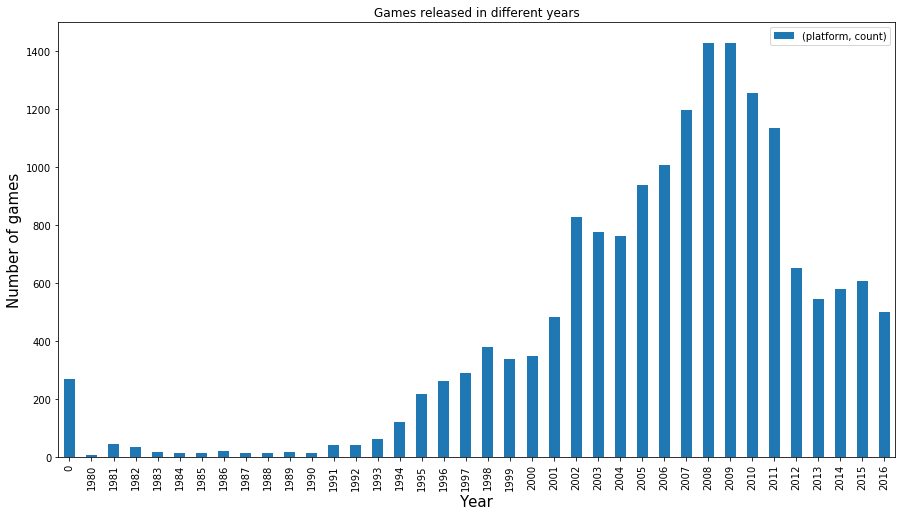

In [45]:
games_grouped.plot.bar(figsize = (15, 8))
plt.title('Games released in different years')
plt.legend()
plt.xlabel('Year', size=15)
plt.ylabel('Number of games', size=15);

As we can see in the above graph, the start of online gaming era is in 1980, there is not so many games release until 1990 but the rise of games and gaming patforms started in the late 90's . The graph shows the climb from the 1995 to the 21'st century.the highest numbers of released was recorded in 2007 to 2009. The data for every period mentioned in the graph would not be significant in predicting a marketing campaign for 2017 and so therefore i will slice it after determining which year would be significant. We can see here is positively skewed and it is cosidered to be a good behavior.


<p><a name="variedsales"></a></p>

#### Looking at  how sales varied from platform to platform.

In [46]:
platform_grouped = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

In [47]:
print(platform_grouped)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


Here we can see how sales varied from platform to platform. The platform with the highest number of sales in PS2 and the platform with lowest sale is PCFX. We will slice the platform with greatest number of sales and we will assume 100 is the beachmark as greatest sales, that means we will remove all flatform below 100.

<p><a name="greatestsales"></a></p>

#### Platforms with the greatest total sales.

In [48]:
df_test = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).copy()
df_platform = df_test[df_test > 100.0]
df_platform

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
Name: total_sales, dtype: float64

The above list of platform  that are considered to have greatest sales.

#### Greatest total sales by platform in graph.

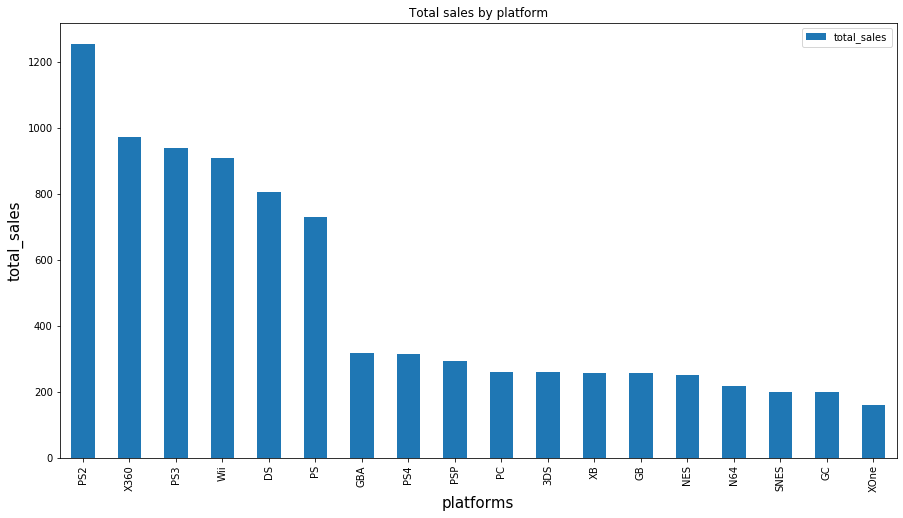

In [49]:
df_platform.plot.bar(figsize = (15, 8))
plt.title('Total sales by platform')
plt.legend()
plt.xlabel('platforms', size=15)
plt.ylabel('total_sales', size=15);

By putting the data in the graph, it is easier to  how the sales differ from every platform.

<p><a name="pop2zero"></a></p>

#### Platforms that used to be popular but now have zero sales.

In [50]:
dfnew = df.copy()
df_2016 = dfnew[dfnew['year_of_release'] == 2016]['platform'].unique()
dfnew = dfnew[(dfnew['total_sales'] >= 0.5) & (dfnew['platform'].isin(df_2016) == False)]
print("The following are the platforms which were once famous and now have zero sales:\n\n", dfnew['platform'].unique())

The following are the platforms which were once famous and now have zero sales:

 ['NES' 'GB' 'DS' 'PS2' 'SNES' 'GBA' 'N64' 'PS' 'XB' '2600' 'PSP' 'GC'
 'GEN' 'DC' 'SAT' 'SCD' 'WS']


We determine the platforms that used to be popular but now have zero sales by assuming that any platform is popular if its total sales are greater than 0.5. The now time period will be considered 2016.

####  Determining how long does it generally take for new platforms to appear and old ones to fade.

In [51]:
# extracting the PS2 from the column since it has the greatest number of total sales 
ps2_data = df[(df['platform'] == 'PS2')] 

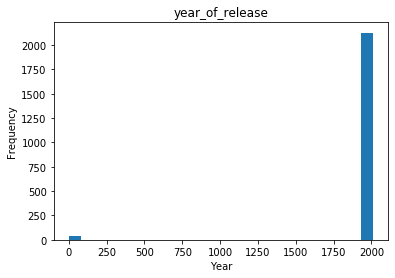

In [52]:
# building a distribution based on ps2 data for each year
ps2_data['year_of_release'].plot.hist(bins=25)
plt.title('year_of_release')
plt.xlabel('Year');

as we can see here in the graph the year distribution of ps2 is only in between 2000 to 2011, they have a high number of release in years 2002  to 2007 and with the lowest in 2011 and no more the following years.

In [53]:
# Wii platforms that used to be popular but now have zero sales
X360_data = df[(df['platform'] == 'X360')]

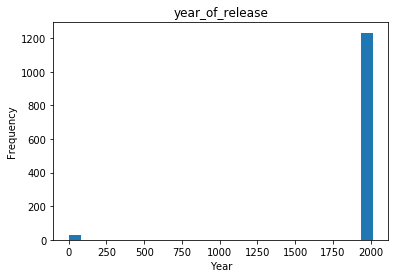

In [54]:
# building a distribution based on wii data for each year
X360_data['year_of_release'].plot.hist(bins=25)
plt.title('year_of_release')
plt.xlabel('Year');

extracting the PS3 from the column since it has the greatest number of total sales 

In [55]:
ps3_data = df[(df['platform'] == 'PS3')] 

Building a distribution based on wii data for each year

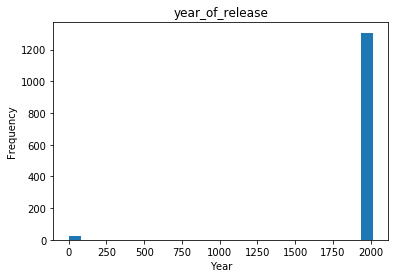

In [56]:
ps3_data['year_of_release'].plot.hist(bins=25)
plt.title('year_of_release')
plt.xlabel('Year');

By making the sample slices of platforms we observe that the most famous platforms has 10 years life span before it is being replaced or fade.

<p><a name="relevantperiod"></a></p>

#### Determining relevant data and period.

In [57]:
df_relyear = df[df['year_of_release'] > 2012 ]
df_relyear

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,undefined,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,undefined,0.01


In [58]:
#df_filetered_year = df_relyear[['platform', 'year_of_release']]
#df_filetered_year

In [59]:
#df_filtered = df[df['year_of_release'] > 2014]['platform'].unique()
#df_filtered = np.delete(df_filtered, 5) # Removing PC platform
#relevant_years = df[df['platform'].isin(df_filtered)]['year_of_release'].unique()
#print("The following relevant periods are chosen:\n\n", relevant_years)
#print("\n\nThe following relevant platforms in the above time periods are chosen:\n\n", df_filtered)

The platform PC was also selected during our processing but was ignored due to its extreme number of outliers. If PC was included then all the other time periods would also get selected which would not present any relevant data for the rest of the selected platforms and it will become redundant, therefore PC platform was ignored from our finalized dataset.

#### Selecting data for prognosis

In [60]:
#df_final = df[(df['year_of_release'].isin(relevant_years)) & (df['platform'].isin(df_filtered))]
#df_final

In [61]:
#grouping the final platform and determining the highest selling platform for the past 4 years
df_relyear.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

The above platforms are the one selected for prognosis, from highest to lowest sales.

<p><a name="growsink"></a></p>

#### Growing and sinking platforms

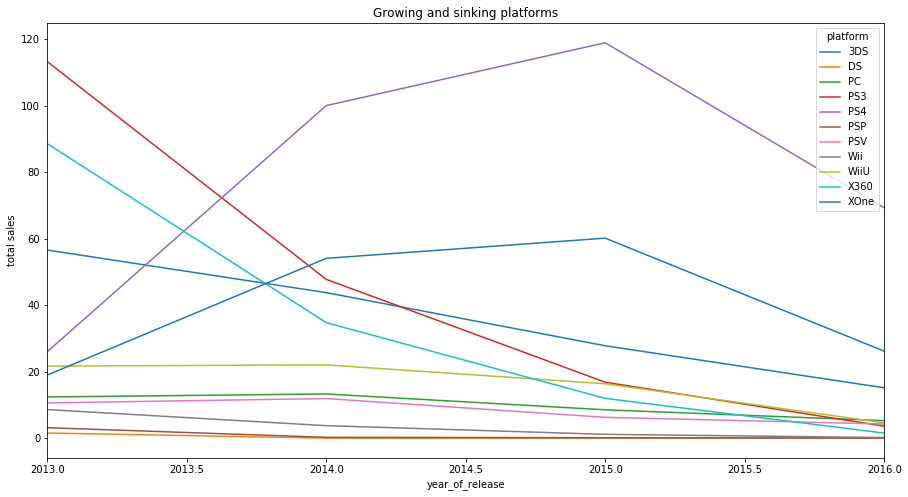

In [62]:
df_relyear.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0).plot(figsize = (15, 8))
plt.title('Growing and sinking platforms')
plt.ylabel('total sales');

The above line graph shows which of the choosen platforms in our choosen time periods are growing and shrinking in sales. According to the above graph, the platforms that are currently in the growth phase are PS4, XOne, 3DS and are growing in sales. The rest of the remaining platforms are shrinking in sales.

#### Box plot for the global sales of all games.

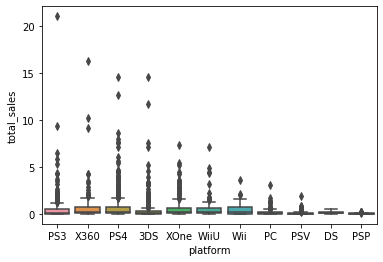

<Figure size 1440x576 with 0 Axes>

In [103]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=tips, palette="Set3")
#sns.boxplot( y=df_relyear["total_sales"], x=df_relyear["platform"])
#plt.figure(figsize=(15,8));
plt.figure(figsize=(20, 8));

Mean Value of PS3 is 0.5258840579710146
Mean Value of X360 is 0.735483870967742
Mean Value of PS4 is 0.8013775510204081
Mean Value of 3DS is 0.47277227722772275
Mean Value of XOne is 0.6450202429149796
Mean Value of WiiU is 0.562
Mean Value of Wii is 0.5939130434782608
Mean Value of PC is 0.20862433862433863
Mean Value of PSV is 0.0921508379888268
Mean Value of DS is 0.1925
Mean Value of PSP is 0.05223880597014925


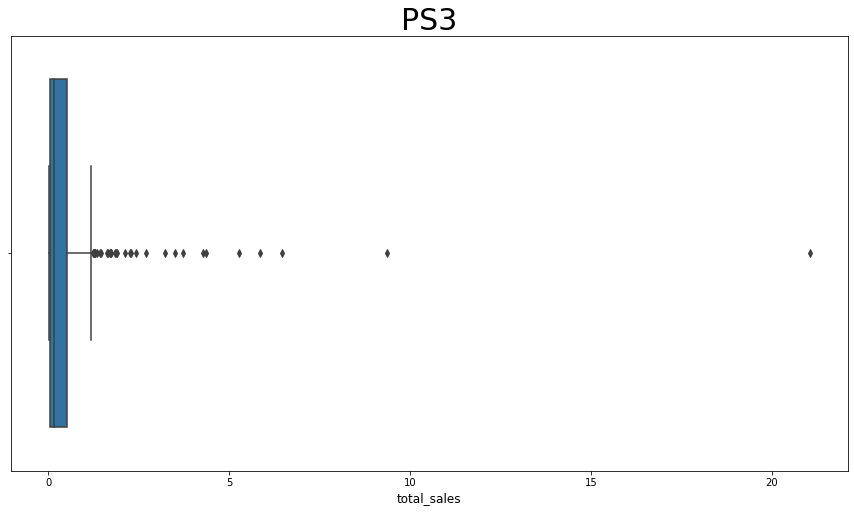

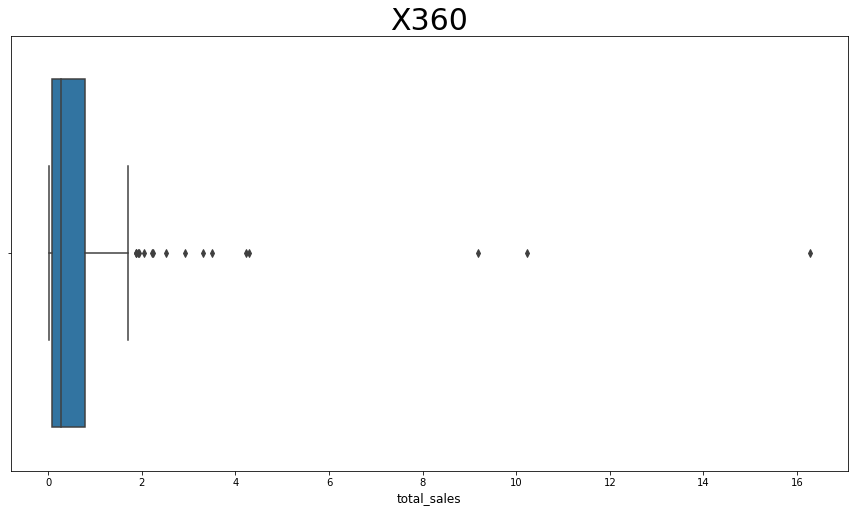

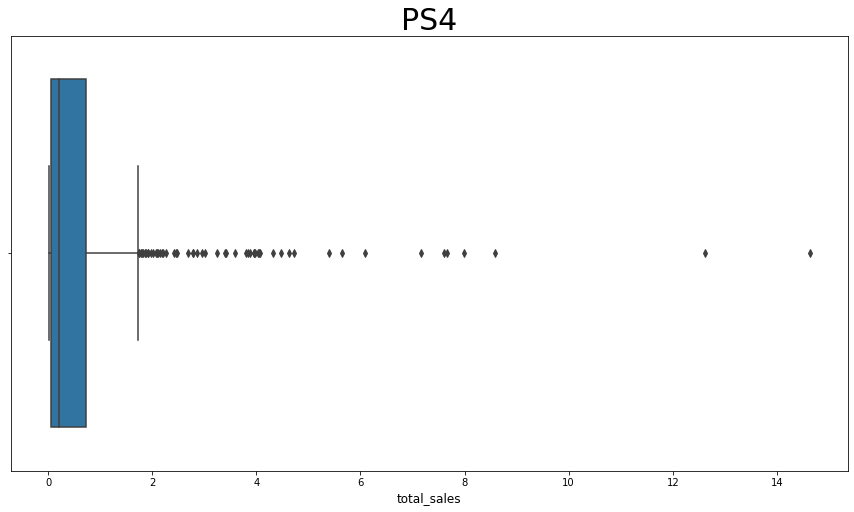

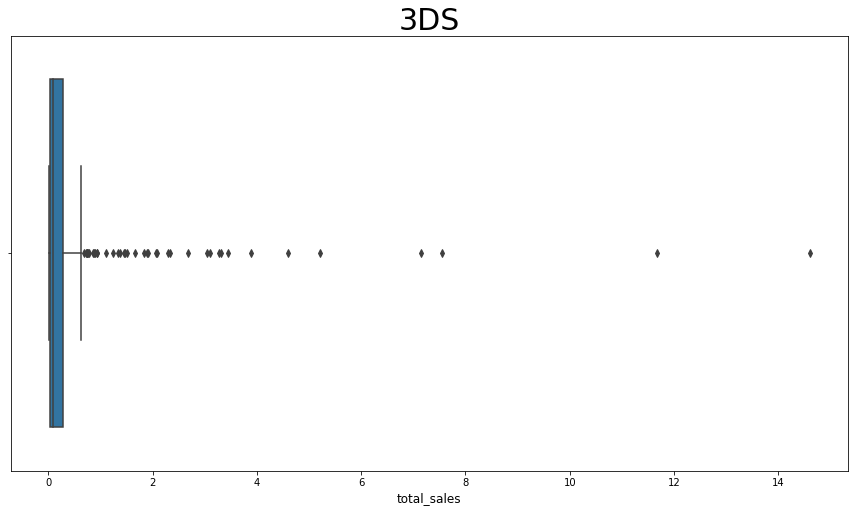

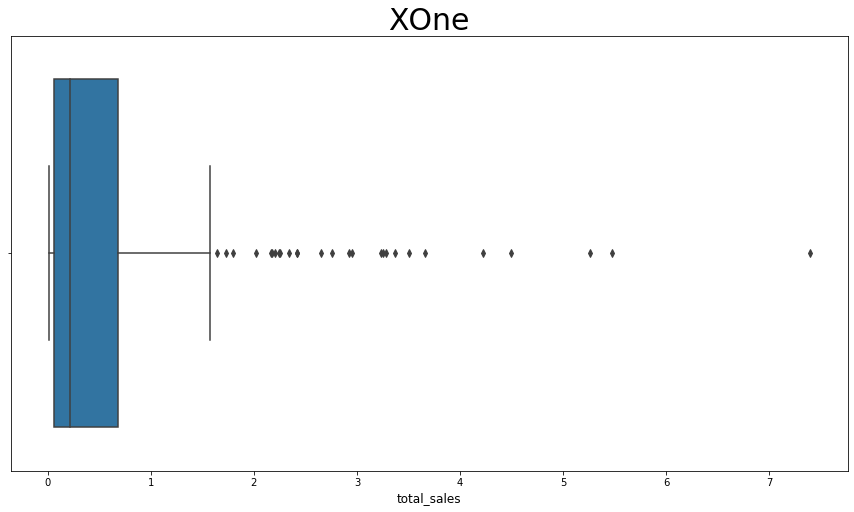

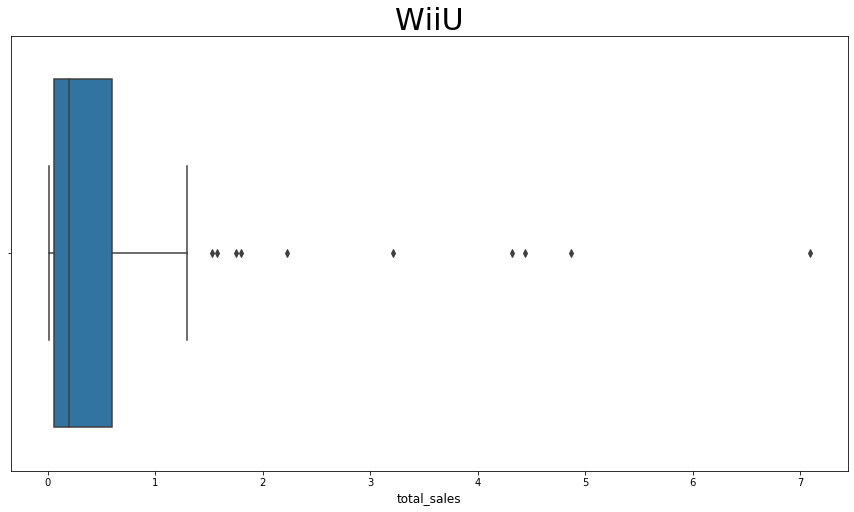

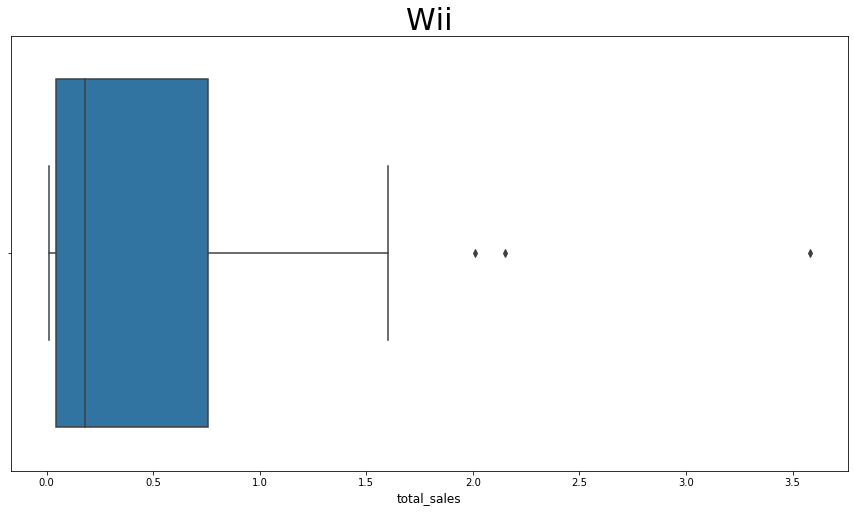

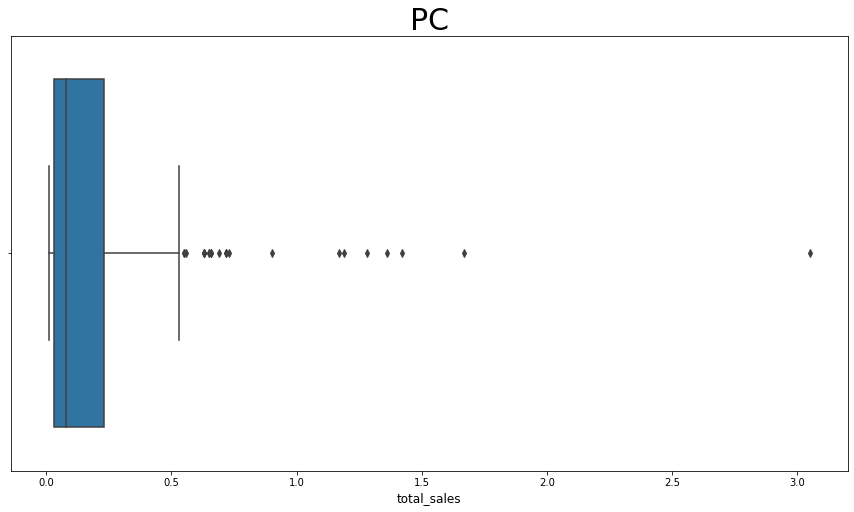

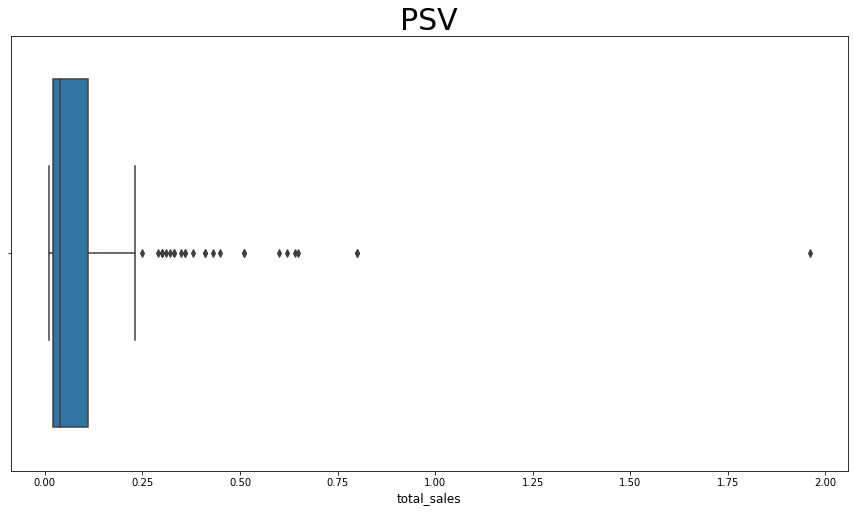

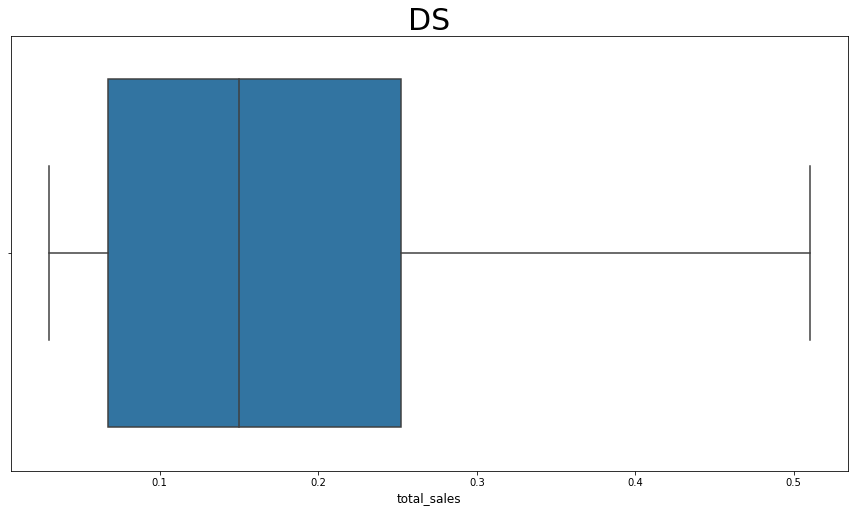

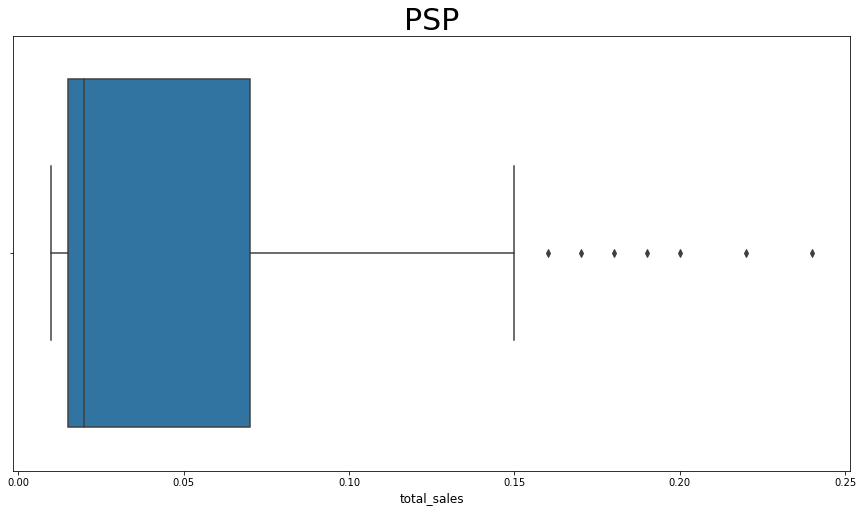

In [64]:
games_sales = df_relyear.groupby(['platform', 'name'])['total_sales'].sum()
for name in df_relyear['platform'].unique():
    plt.figure(figsize=(15,8))
    plt.xlabel('total Sales', size=12)
    plt.title(name, size = 30)
    sns.boxplot(games_sales[name])
    print("Mean Value of", name, "is", games_sales[name].mean())

The difference is sales is quite visible and significant in the above graphs. Every platform has a lot of positive outliers but it can also be seen that most of the outliers are clustered close to the maximum value. The average sales values for most of the platforms are pretty close except for the PSV platform. These similarities indicate that we were right in selecting these platforms and time periods to compute results for 2017 as they are all closely connected in terms of their statistical features.

<p><a name="corelation"></a></p>

#### Build a scatter plot and calculate the correlation between reviews and sales of PS4

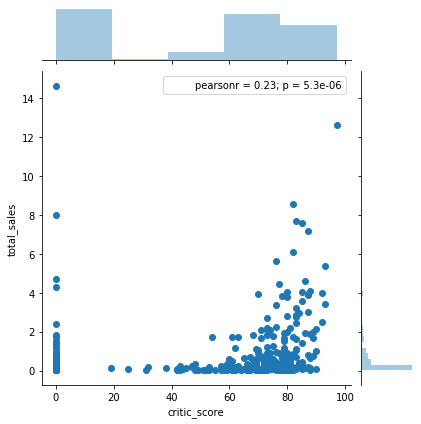

In [65]:
# Scatter plot for PS4  critic_score with column Total_sales

PS4_critic = df_relyear[df_relyear['platform'] == 'PS4'][['name', 'critic_score', 'total_sales']]
sns.jointplot('critic_score', 'total_sales', PS4_critic, kind = 'scatter').annotate(stats.pearsonr);

The above is a scatter plot between critic_score and Total_sales and on the top is the correlation score is displayed. The correlation score for them is 0.23 which means that the two columns are positively correlated but it is weak and likely unimportant. It means a good or higher critic_score might fetch higher sales for the PS4 platform.

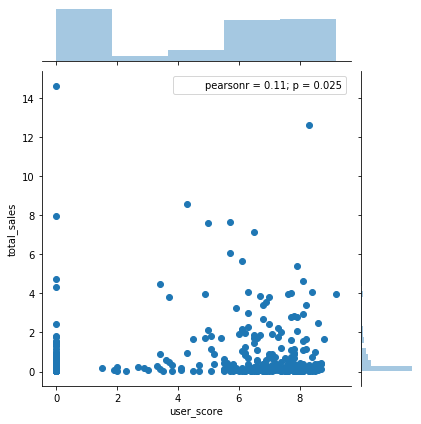

In [66]:
# Scatter plot for PS4 user_score with column Total_sales

PS4_user = df_relyear[df_relyear['platform'] == 'PS4'][['name', 'user_score', 'total_sales']]
sns.jointplot('user_score', 'total_sales', PS4_user, kind = 'scatter').annotate(stats.pearsonr);

The above is a scatter plot between user_score and total_sales of PS4 shows positive correlation score of 0.11 which means that the two columns display a positive correlation but a very weak one. As the correlation score is very close to 0, so the two columns wont display any correlated behaviour(not negative or positive). This suggests that no matter what the value of user_score is, it will not affect the sales of PS4 platform according to the provided data

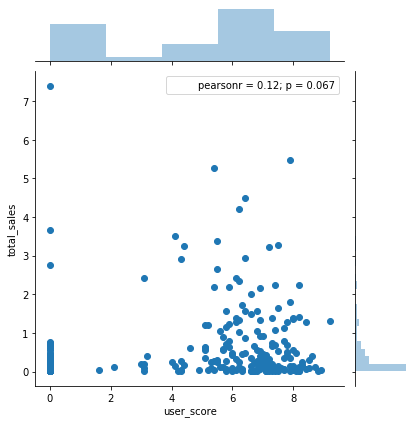

In [67]:
# Scatter plot for XOne user_score with column Total_sales

XOne_user = df_relyear[df_relyear['platform'] == 'XOne'][['name', 'user_score', 'total_sales']]
sns.jointplot('user_score', 'total_sales', XOne_user, kind = 'scatter').annotate(stats.pearsonr);

Comparing the sales of the same games on other platforms, we still get almost similar result from the previous scatter plot of pS4 therefore we stick to our previous conclusion.

<p><a name="gendist"></a></p>

#### General distribution of games by genre

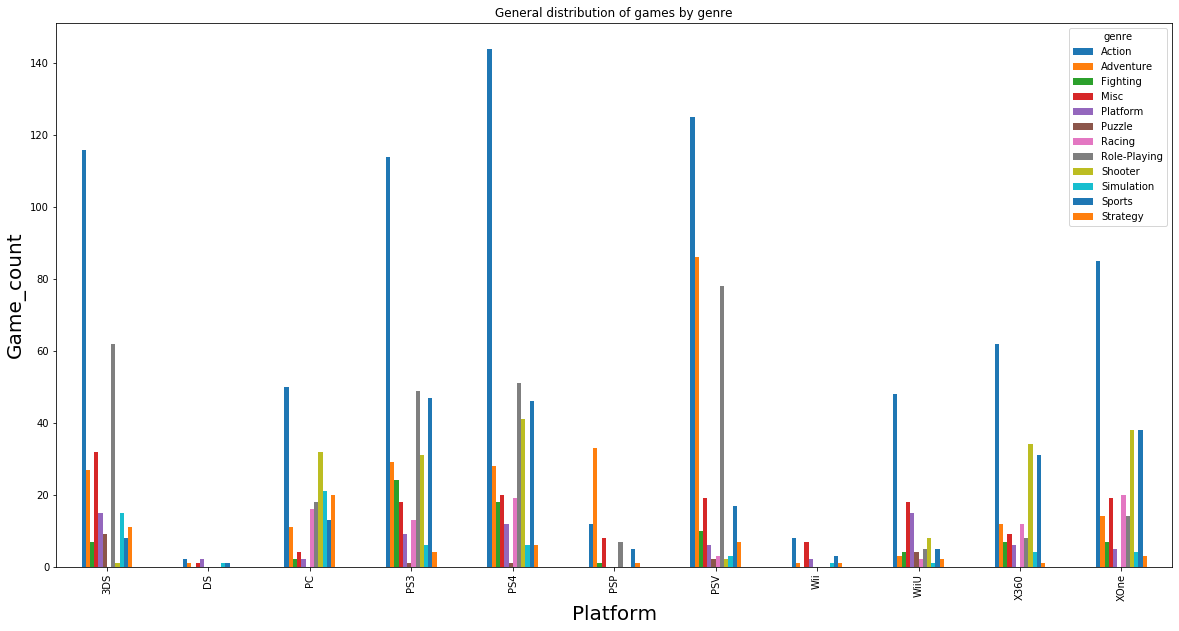

In [95]:
df_relyear.groupby(['platform', 'genre'])['name'].count().unstack().fillna(0).plot.bar(figsize = (20, 10))
plt.title('General distribution of games by genre')
plt.xlabel('Platform', size=20)
plt.ylabel('Game_count', size=20);

The above graph the popularity of genre games in every platform. Here we can see that action genre is the most popular in all platforms wile puzzle to be the least popular.

<p><a name="profitable"></a></p>

#### Most profitable games with high and low sales

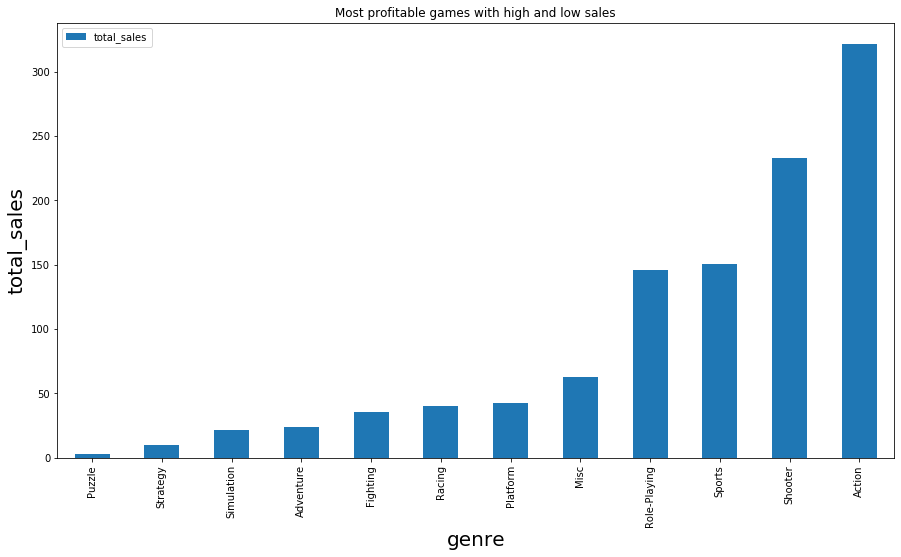

In [70]:
df_relyear.groupby(['genre'])['total_sales'].sum().reset_index().sort_values('total_sales').plot.bar(x='genre', y='total_sales', figsize=(15,8))
plt.title('Most profitable games with high and low sales')
plt.xlabel('genre', size=20)
plt.ylabel('total_sales', size=20);

Action is the most popular genre it is normally the most profitable games genre in all platform including all other genre that are related to competitive type of gaming genres such as shooter and sports.Base on our graph games where users have to play against some other user or users are considered most profitable ones and the rest of the games can be considered less profitble according to the provided data. It can also be noted that games which are available on widely used devices also fetch higher sales than the games which require specific platforms for the games to work.

<p><a name="step3_conclusion"></a></p>

### Conclusion

The Dataset contains  records of platforms since 1980, since our target is to forecast the sales on the following year, we need to filter the data into relevant years and flatforms. After doing so we found out that the greatest selling platform is ps2. After slicing the data to relevant yearn and platform the new data shows that X360 is the greatest selling platform which closely followed to PS3. I also notice that there is a 10 year life span of every platform before it disappear or being replaced by a new one. We also investigated the platforms that are growing and sinking and by plotting a graph we found out that PS4, XOne, 3DS and are growing in sales among all other platform. In terms of relationship between rating and user score relationship to sales, we found a positive corelation between them but a very weak one that is close to zero, meaning they do not have a very huge effect on sales.As for the genres the one that generates most sales are action, shooter and sports, mostly games that are related to competitive type of gaming genre or games that requires players to compeate against each other are the one the sells the most.

<p><a name="Step 4"></a></p>

### Step 4. Create a user profile for each region

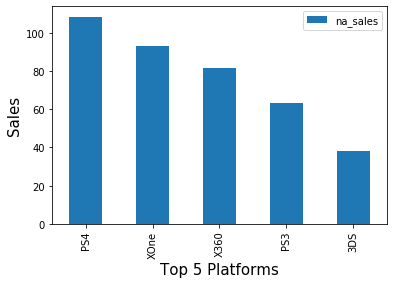

In [71]:
# the top 5 platforms based on sales in the na region.
df_relyear.groupby(['platform'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False).head().set_index('platform').plot.bar()
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15);

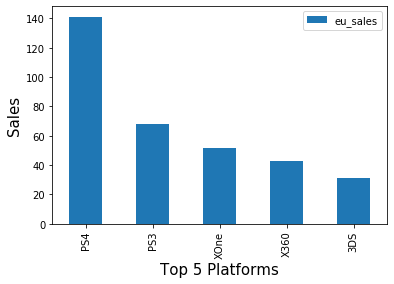

In [72]:
# the top 5 platforms based on sales in the eu region.
df_relyear.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False).head().set_index('platform').plot.bar()
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15);

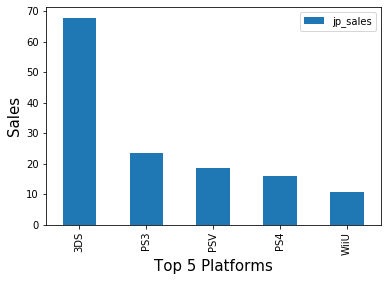

In [73]:
# the top 5 platforms based on sales in the jp region.
df_relyear.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False).head().set_index('platform').plot.bar()
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15);

The top 5 population platform in na and eu region has similarity where PS4 is the top selling platform while followed by PS3 ,X360, XOne and 3DS with slight variation in sales. While Jp region has another behavior in terms of choocing sa platform 3DS is the top selling followed by PS3, PSV, PS4 and WiiU.

#### variations of market shares from region to region.

In [74]:
market_share =df_relyear['total_sales'].sum()

In [75]:
# Market share of na region
na_share = df_relyear['na_sales'].sum()
na_pshare = na_share / market_share 
print('the percentage of market share of na region:', "{:.2%}". format(na_pshare))

the percentage of market share of na region: 40.13%


In [76]:
# market share of eu region
eu_share = df_relyear['eu_sales'].sum()
eu_pshare = eu_share / market_share 
print('the percentage of market share of na region:', "{:.2%}". format(eu_pshare))

the percentage of market share of na region: 35.96%


In [77]:
# market share of jp region
jp_share = df_relyear['jp_sales'].sum()
jp_pshare = jp_share / market_share 
print('the percentage of market share of na region:', "{:.2%}". format(jp_pshare))

the percentage of market share of na region: 12.91%


our calculation shows that out of the 100% market share, the na region occupies 49.5% it gets the highest share among other region, the eu region occupies 31.4%, and the jp region occupies 8.5%. The remaining market share is occupied by the other_sales .

#### Top five genres for each region based on sales

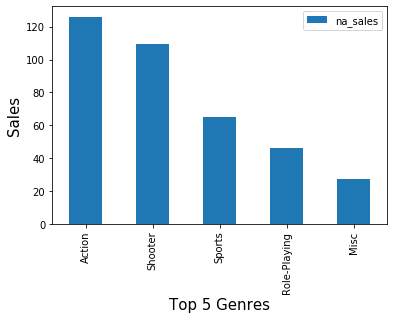

In [78]:
# Top 5 genres based on sales in the na region
df_relyear.groupby(['genre'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False).head().set_index('genre').plot.bar()
plt.xlabel('Top 5 Genres', size=15)
plt.ylabel('Sales', size=15);

Action genre is the most popular in terms of sale in na region while shooter and sports, Role-playing and Misc.

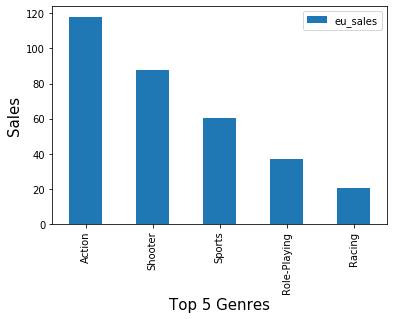

In [79]:
# top 5 genres based on sales in the eu region
df_relyear.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False).head().set_index('genre').plot.bar()
plt.xlabel('Top 5 Genres', size=15)
plt.ylabel('Sales', size=15);

in eu region action is also the most popular genre and followed by shooter, sports, Role-playing and racing.

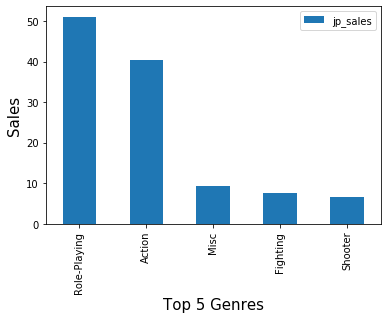

In [80]:
# Top 5 genres based on sales in the jp region
df_relyear.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False).head().set_index('genre').plot.bar()
plt.xlabel('Top 5 Genres', size=15)
plt.ylabel('Sales', size=15);

In jp region.Role- playing game is more popular over action. In such games, a player is chosen who plays the major role in the storyline full of numerous adventurers and specializes in particular skill sets and that player progress in the storyline incrementing his skills and powers. Action genre follows  then the misc figthing and shooter.

#### Do ESRB ratings affect sales in individual regions?

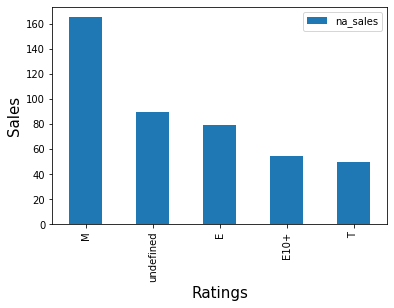

In [81]:
# ESRB rating for na region
df_relyear.groupby(['rating'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False).set_index('rating').plot.bar()
plt.xlabel('Ratings', size=15)
plt.ylabel('Sales', size=15);

In the case of na region the sales of M for Mature has the highest sales, while undefined ratings has almost the same sales with E for everyone.rating does affect sales in this area but there are users who also buys games without rating.

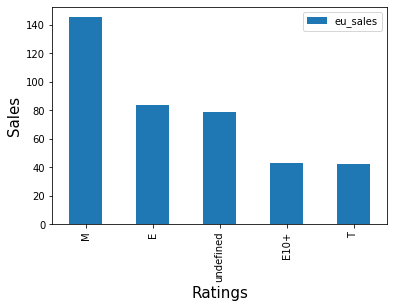

In [82]:
# ESRB rating for eu region
df_relyear.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False).set_index('rating').plot.bar()
plt.xlabel('Ratings', size=15)
plt.ylabel('Sales', size=15);

In the case of eu region Mature games has the highest sales, everyone and undefined almost has the sale sales while teen and E10+ rating almost has the same rating so the behavior of eu region is almost the same with na region, where rating affect the sales but not entirely.

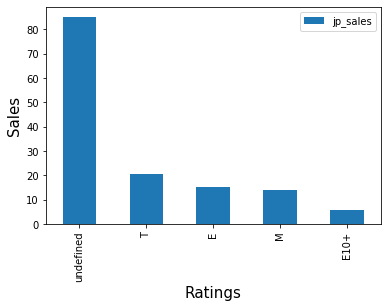

In [83]:
# ESRB rating for jp region
df_relyear.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False).set_index('rating').plot.bar()
plt.xlabel('Ratings', size=15)
plt.ylabel('Sales', size=15);

For jp region, the sales of games with undefined rating is higher compared to the one that has rating, So we can assume that in the jp region, the ESRB rating does not affect sales.

<p><a name="step4_conclusion"></a></p>

### Conclusion

In this step we did the profilling per region for us to have a better view of the behavior of users and which platform is more popular and how many percentage they have on the market. we found out that in terms of platform the popularity is almost the same where PS3, PS4, Wii, X360 and 3DS in common in the 3 region. in terms of market share na region has the highest market share followed by eu this data could help us in terms of scope of promotion. In terms of genre, na and eu has almost similar behavior where they have the same top 3 genre which is action, sports and shooter, basically a genre that requires to compeate with another player.Japan region tend to have a slight different behavior in the type of genre where they prefer role-playing and action more over other genre.With ERSB rating na and eu region still have similar behavior where rating does affect the sales while in jp region is another thing because rating does not affect the sales.

<p><a name="Step 5"></a></p>

### Step 5. Test the hypotheses

#### Hypotheses 1

The null hypothesis H₀, is the average user ratings of the Xbox One and PC platforms are the same.

And The alternative hypothesis, H₁, is the average user ratings of the Xbox One and PC platforms are not the same.


In [84]:
Xbox_one = df[(df['platform'] == 'XOne')] 
PC_one = df[(df['platform'] == 'PC')] 

In [85]:
print('Xbox mean: '"{:.5}". format(Xbox_one['user_score'].mean()))
print('PC mean: '"{:.5}". format(PC_one['user_score'].mean()))

Xbox mean: 4.8053
PC mean: 5.5833


In [86]:
results = st.stats.ttest_ind(Xbox_one['user_score'], PC_one['user_score'], equal_var= False)

In [87]:
alpha = .05

In [88]:
print('p-value:', results.pvalue )
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.0005315801015576501
We reject the null hypothesis


In [90]:
action_genre = df[(df['genre'] == 'Action')] 
sports_genre = df[(df['genre'] == 'Sports')] 

In [91]:
print('Action mean: '"{:.5}". format(action_genre['user_score'].mean()))
print('Sports mean: '"{:.5}". format(sports_genre['user_score'].mean()))

Action mean: 3.8317
Sports mean: 3.2701


In [92]:
results = st.stats.ttest_ind(action_genre['user_score'], sports_genre['user_score'], equal_var= False)

In [93]:
alpha = .05

In [94]:
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.1599167086071376e-08
We reject the null hypothesis


<p><a name="step5_conclusion"></a></p>

### Conclusion

This part tackles about the ratings, we are trying to find out the probability that  the average user ratings of the Xbox One and PC platforms are the same. and by formulating the hyphothesis we found out its not the same. while the second hyphothesis we are tying to find out the probability that the average user ratings for the Action and Sports genres are not different and by formulating the hyphothesis we found out that out null hyphothesis is correct.

<p><a name="Step 6"></a></p>

### General Conclusion

Our dataset contains historical datas og online games and sales around the world  by exploring and analyzing the data, we found out the behavior of users from 3 different major regions where na region has the highest market share followed by eu, we also found out that PS2, X360 and PS3 has greatest sales in the data and a platform typically last 10 years before its fades or being replaced. After slicing the data to relevant years and platforms it was easier we found out that PS4, XOne, 3DS are growing in sales and has the potential to earn in the following year. In terms of genre, our data shows action is the most popular followed by sports and shooter, mostly games that requires player to compeate with each other.We also tackle the posibility of corelation between user score and sales and we found out the weak positive corelation between the 2 meaning it does not affect so much. In terms of ERSB rating the region from na and eu has almost the same behavior where rating affect the sales but japan is the opposite where rating does not affect the sales. 